In [2]:
import pandas as pd
import os

from matplotlib import pyplot as plt

# Brazil Data Analysis

In [96]:
file_name_brazil = "FAOSTAT_data_2-28-2021_brazil.csv"
folder_path_brazil = "../data"
full_file_path_brazil = os.path.join(folder_path_brazil, file_name_brazil)

In [97]:
df_brazil_potatoes = pd.read_csv(full_file_path_brazil)

In [98]:
df_brazil_potatoes.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QC,Crops,21,Brazil,5312,Area harvested,116,Potatoes,1961,1961,ha,191255,NaN,Official data
1,QC,Crops,21,Brazil,5312,Area harvested,116,Potatoes,1962,1962,ha,196198,NaN,Official data
2,QC,Crops,21,Brazil,5312,Area harvested,116,Potatoes,1963,1963,ha,199788,NaN,Official data
3,QC,Crops,21,Brazil,5312,Area harvested,116,Potatoes,1964,1964,ha,208674,NaN,Official data
4,QC,Crops,21,Brazil,5312,Area harvested,116,Potatoes,1965,1965,ha,202257,NaN,Official data


In [99]:
df_brazil_potatoes['Unit'].unique()

array(['ha', 'hg/ha', 'tonnes'], dtype=object)

In [100]:
df_brazil_potatoes['Element'].unique()

array(['Area harvested', 'Yield', 'Production'], dtype=object)

<b>Areas</b> refer to the area under cultivation. Area under cultivation means the area that corresponds to the total sown area, but after the harvest it excludes ruined areas (e.g. due to natural disasters). If the same land parcel is used twice in the same year, the area of this parcel can be counted twice. For tree crops, some countries provide data in terms of number of trees instead of in area. This number is then converted to an area estimate using typical planting density conversions. <b>Production</b> means the harvested production. 

<b>Harvested production</b> means production including on-holding losses and wastage, quantities consumed directly on the farm and marketed quantities, indicated in units of basic product weight. <b>Harvest year</b> means the calendar year in which the harvest begins. <b>Yield</b> means the harvested production per ha for the area under cultivation. Seed quantity comprises all amounts of the commodity in question used during the reference period for reproductive purposes, such as seed or seedlings. Whenever official data are not available, seed figures can be estimated either as a percentage of production or by multiplying a seed rate (the average amount of seed needed per hectare planted) with the planted area of the particular crop of the subsequent year. Usually, the average seed rate in any given country does not vary greatly from year to year.

In [101]:
df_brazil_potatoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Domain Code       177 non-null    object
 1   Domain            177 non-null    object
 2   Area Code         177 non-null    int64 
 3   Area              177 non-null    object
 4   Element Code      177 non-null    int64 
 5   Element           177 non-null    object
 6   Item Code         177 non-null    int64 
 7   Item              177 non-null    object
 8   Year Code         177 non-null    int64 
 9   Year              177 non-null    int64 
 10  Unit              177 non-null    object
 11  Value             177 non-null    int64 
 12  Flag              59 non-null     object
 13  Flag Description  177 non-null    object
dtypes: int64(6), object(8)
memory usage: 19.5+ KB


In [102]:
df_brazil_potatoes.describe()

,Area Code,Element Code,Item Code,Year Code,Year,Value
count,177.0,177.000000,177.0,177.000000,177.000000,1.770000e+02
mean,21.0,5413.666667,116.0,1990.000000,1990.000000,9.214600e+05
std,0.0,81.150650,0.0,17.077697,17.077697,1.183598e+06
min,21.0,5312.000000,116.0,1961.000000,1961.000000,5.648500e+04
25%,21.0,5312.000000,116.0,1975.000000,1975.000000,1.427040e+05
50%,21.0,5419.000000,116.0,1990.000000,1990.000000,1.993080e+05
75%,21.0,5510.000000,116.0,2005.000000,2005.000000,1.672498e+06
max,21.0,5510.000000,116.0,2019.000000,2019.000000,3.917234e+06


In [103]:
df_temp_brazil = df_brazil_potatoes[['Element', 'Item', 'Value', 'Unit', 'Year']]

In [104]:
df_temp_brazil.head()

,Element,Item,Value,Unit,Year
0,Area harvested,Potatoes,191255,ha,1961
1,Area harvested,Potatoes,196198,ha,1962
2,Area harvested,Potatoes,199788,ha,1963
3,Area harvested,Potatoes,208674,ha,1964
4,Area harvested,Potatoes,202257,ha,1965


In [105]:
df_temp_brazil.tail()

,Element,Item,Value,Unit,Year
172,Production,Potatoes,3867681,tonnes,2015
173,Production,Potatoes,3851396,tonnes,2016
174,Production,Potatoes,3655069,tonnes,2017
175,Production,Potatoes,3728953,tonnes,2018
176,Production,Potatoes,3696930,tonnes,2019


In [106]:
df_brazil_prod = df_temp_brazil[(df_temp_brazil['Element'] == 'Production')]
df_brazil_prod.head()

,Element,Item,Value,Unit,Year
118,Production,Potatoes,1080310,tonnes,1961
119,Production,Potatoes,1133860,tonnes,1962
120,Production,Potatoes,1167774,tonnes,1963
121,Production,Potatoes,1263812,tonnes,1964
122,Production,Potatoes,1245857,tonnes,1965


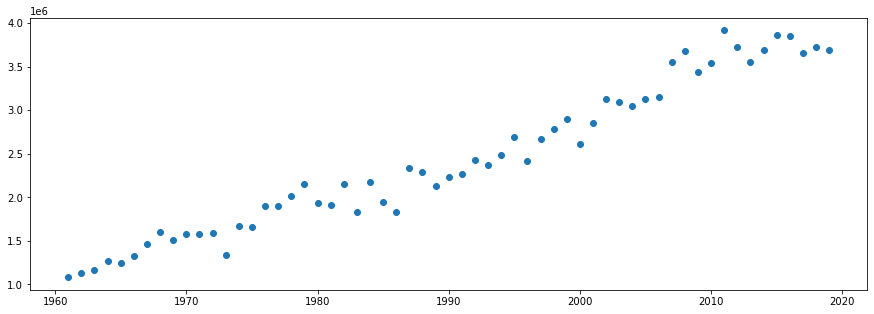

In [107]:
x_brazil_prod = df_brazil_prod['Year']
y_brazil_prod = df_brazil_prod['Value']

plt.figure(figsize=(15,5))
plt.scatter(x_brazil_prod, y_brazil_prod)

plt.show()

In [108]:
df_brazil_yield = df_temp_brazil[(df_temp_brazil['Element'] == 'Yield')]
df_brazil_yield.head()

,Element,Item,Value,Unit,Year
59,Yield,Potatoes,56485,hg/ha,1961
60,Yield,Potatoes,57792,hg/ha,1962
61,Yield,Potatoes,58451,hg/ha,1963
62,Yield,Potatoes,60564,hg/ha,1964
63,Yield,Potatoes,61598,hg/ha,1965


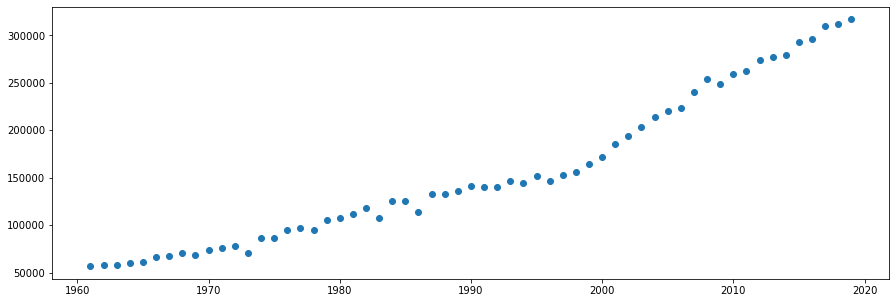

In [110]:
x_brazil_yield = df_brazil_yield['Year']
y_brazil_yield  = df_brazil_yield['Value']

plt.figure(figsize=(15,5))
plt.scatter(x_brazil_yield , y_brazil_yield )

plt.show()

In [111]:
df_brazil_ah = df_temp_brazil[(df_temp_brazil['Element'] == 'Area harvested')]
df_brazil_ah.head()

,Element,Item,Value,Unit,Year
0,Area harvested,Potatoes,191255,ha,1961
1,Area harvested,Potatoes,196198,ha,1962
2,Area harvested,Potatoes,199788,ha,1963
3,Area harvested,Potatoes,208674,ha,1964
4,Area harvested,Potatoes,202257,ha,1965


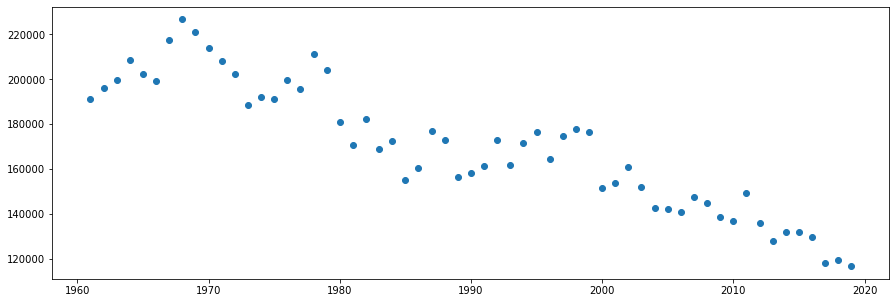

In [112]:
x_brazil_ah = df_brazil_ah['Year']
y_brazil_ah = df_brazil_ah['Value']

plt.figure(figsize=(15,5))
plt.scatter(x_brazil_ah, y_brazil_ah)

plt.show()

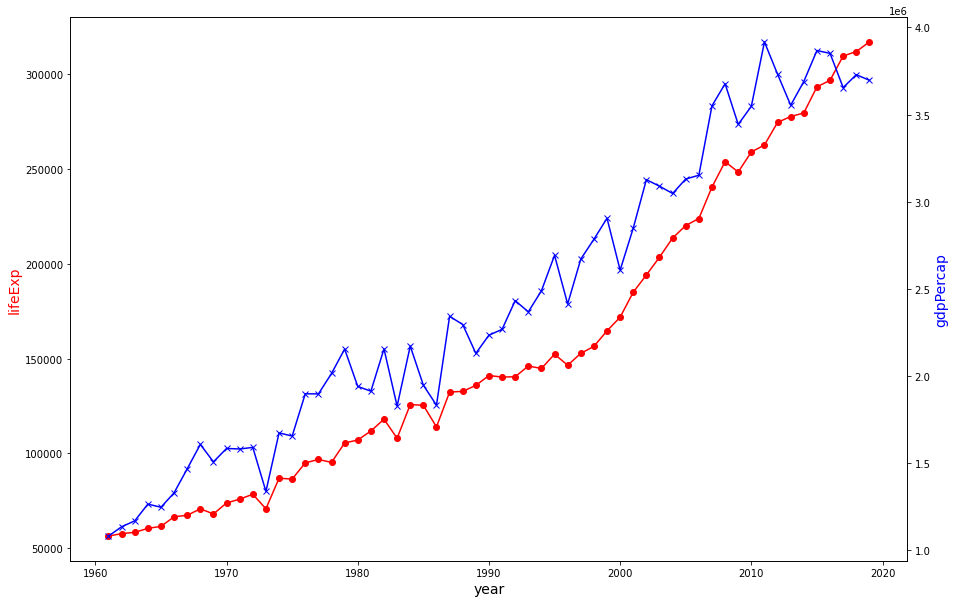

In [121]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(15, 10))

# make a plot
ax.plot(df_brazil_yield["Year"], df_brazil_yield["Value"], color="red", marker="o")

# set x-axis label
ax.set_xlabel("year",fontsize=14)

# set y-axis label
ax.set_ylabel("value hg/ha",color="red",fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()

# make a plot with different y-axis using second axis object
ax2.plot(df_brazil_prod["Year"], df_brazil_prod["Value"],color="blue",marker="x")
ax2.set_ylabel("value ha",color="blue",fontsize=14)
plt.show()

# save the plot as a file
fig.savefig('production_vs_yield_brazil.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')


# USA Data Analysis

In [114]:
file_name_usa = "FAOSTAT_data_2-28-2021_usa.csv"
folder_path_usa = "../data"
full_file_path_usa = os.path.join(folder_path_usa, file_name_usa)

In [115]:
df_usa_potatoes = pd.read_csv(full_file_path_usa)

In [116]:
df_usa_potatoes.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QC,Crops,231,United States of America,5312,Area harvested,116,Potatoes,1961,1961,ha,599268,NaN,Official data
1,QC,Crops,231,United States of America,5312,Area harvested,116,Potatoes,1962,1962,ha,545416,NaN,Official data
2,QC,Crops,231,United States of America,5312,Area harvested,116,Potatoes,1963,1963,ha,535715,NaN,Official data
3,QC,Crops,231,United States of America,5312,Area harvested,116,Potatoes,1964,1964,ha,515019,NaN,Official data
4,QC,Crops,231,United States of America,5312,Area harvested,116,Potatoes,1965,1965,ha,560057,NaN,Official data


In [117]:
df_temp_usa = df_usa_potatoes[['Element', 'Item', 'Value', 'Unit', 'Year']]

In [118]:
df_temp_usa.head()

,Element,Item,Value,Unit,Year
0,Area harvested,Potatoes,599268,ha,1961
1,Area harvested,Potatoes,545416,ha,1962
2,Area harvested,Potatoes,535715,ha,1963
3,Area harvested,Potatoes,515019,ha,1964
4,Area harvested,Potatoes,560057,ha,1965


In [119]:
df_usa_prod = df_temp_usa[(df_temp_usa['Element'] == 'Production')]
df_usa_prod.head()

,Element,Item,Value,Unit,Year
118,Production,Potatoes,13305000,tonnes,1961
119,Production,Potatoes,12018000,tonnes,1962
120,Production,Potatoes,12305931,tonnes,1963
121,Production,Potatoes,10941455,tonnes,1964
122,Production,Potatoes,13210568,tonnes,1965


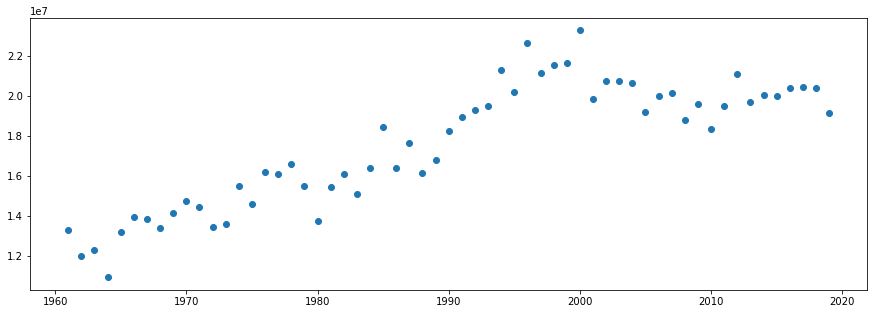

In [94]:
x_usa_prod = df_usa_prod['Year']
y_usa_prod = df_usa_prod['Value']

plt.figure(figsize=(15,5))
plt.scatter(x_usa_prod, y_usa_prod)

plt.show()

In [95]:
df_usa_yield = df_temp_usa[(df_temp_usa['Element'] == 'Yield')]
df_usa_yield.head()

,Element,Item,Value,Unit,Year
59,Yield,Potatoes,222021,hg/ha,1961
60,Yield,Potatoes,220346,hg/ha,1962
61,Yield,Potatoes,229710,hg/ha,1963
62,Yield,Potatoes,212448,hg/ha,1964
63,Yield,Potatoes,235879,hg/ha,1965


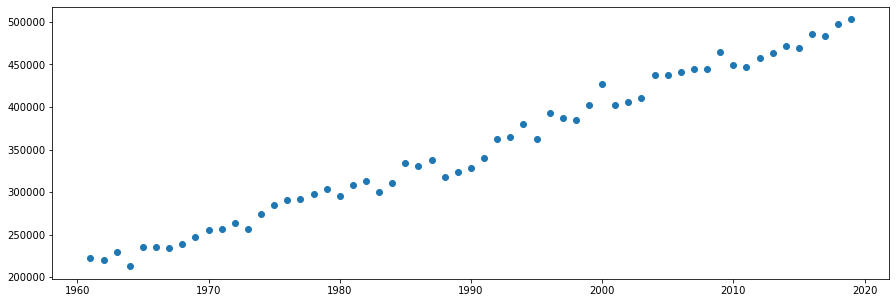

In [120]:
x_usa_yield = df_usa_yield['Year']
y_usa_yield  = df_usa_yield['Value']

plt.figure(figsize=(15,5))
plt.scatter(x_usa_yield , y_usa_yield )

plt.show()

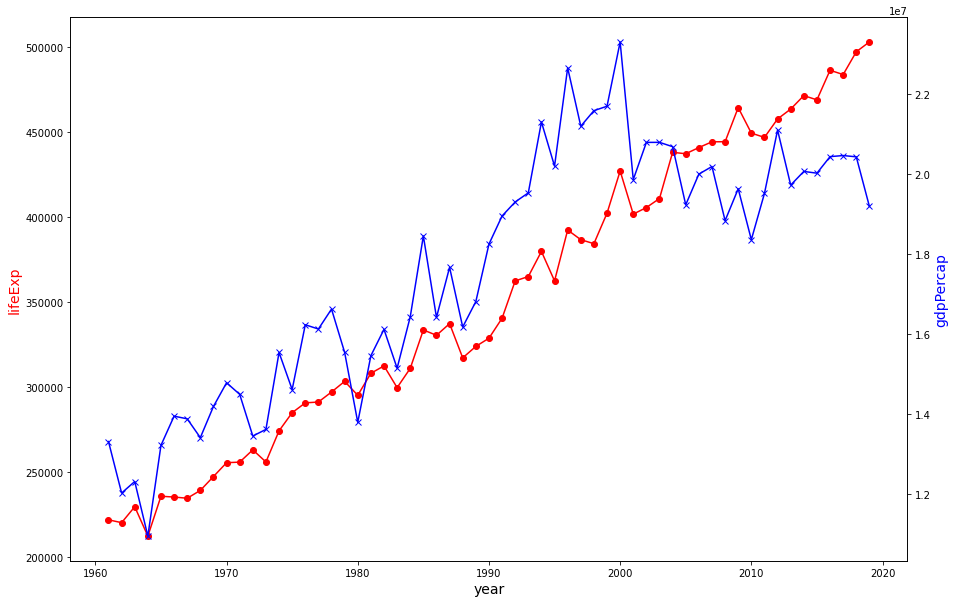

In [122]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(15, 10))

# make a plot
ax.plot(df_usa_yield["Year"], df_usa_yield["Value"], color="red", marker="o")

# set x-axis label
ax.set_xlabel("year",fontsize=14)

# set y-axis label
ax.set_ylabel("value hg/ha",color="red",fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()

# make a plot with different y-axis using second axis object
ax2.plot(df_usa_prod["Year"], df_usa_prod["Value"],color="blue",marker="x")
ax2.set_ylabel("value ha",color="blue",fontsize=14)
plt.show()

# save the plot as a file
fig.savefig('production_vs_yield_usa.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')


# INDIA Data Analysis

In [123]:
file_name_india = "FAOSTAT_data_2-28-2021_india.csv"
folder_path_india = "../data"
full_file_path_india = os.path.join(folder_path_india, file_name_india)

In [124]:
df_india_potatoes = pd.read_csv(full_file_path_india)

In [125]:
df_india_potatoes.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QC,Crops,100,India,5312,Area harvested,116,Potatoes,1961,1961,ha,375000,NaN,Official data
1,QC,Crops,100,India,5312,Area harvested,116,Potatoes,1962,1962,ha,365000,NaN,Official data
2,QC,Crops,100,India,5312,Area harvested,116,Potatoes,1963,1963,ha,413000,NaN,Official data
3,QC,Crops,100,India,5312,Area harvested,116,Potatoes,1964,1964,ha,415000,NaN,Official data
4,QC,Crops,100,India,5312,Area harvested,116,Potatoes,1965,1965,ha,429000,NaN,Official data


In [126]:
df_temp_india = df_india_potatoes[['Element', 'Item', 'Value', 'Unit', 'Year']]

In [127]:
df_temp_india.head()

,Element,Item,Value,Unit,Year
0,Area harvested,Potatoes,375000,ha,1961
1,Area harvested,Potatoes,365000,ha,1962
2,Area harvested,Potatoes,413000,ha,1963
3,Area harvested,Potatoes,415000,ha,1964
4,Area harvested,Potatoes,429000,ha,1965


In [128]:
df_india_prod = df_temp_india[(df_temp_india['Element'] == 'Production')]
df_india_prod.head()

,Element,Item,Value,Unit,Year
118,Production,Potatoes,2719000,tonnes,1961
119,Production,Potatoes,2447000,tonnes,1962
120,Production,Potatoes,3365000,tonnes,1963
121,Production,Potatoes,2593000,tonnes,1964
122,Production,Potatoes,3605000,tonnes,1965


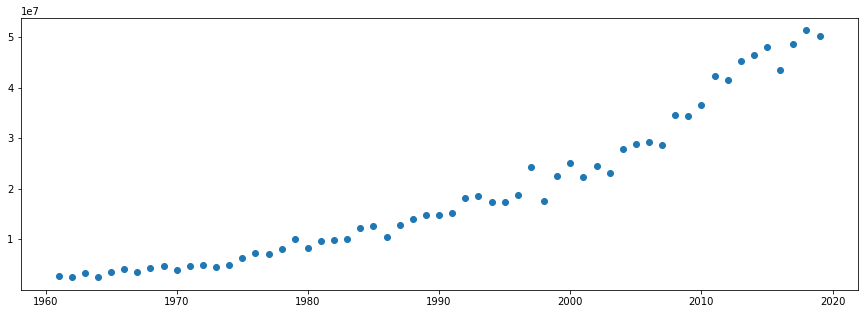

In [129]:
x_india_prod = df_india_prod['Year']
y_india_prod = df_india_prod['Value']

plt.figure(figsize=(15,5))
plt.scatter(x_india_prod, y_india_prod)

plt.show()

In [130]:
df_india_yield = df_temp_india[(df_temp_india['Element'] == 'Yield')]
df_india_yield.head()

,Element,Item,Value,Unit,Year
59,Yield,Potatoes,72507,hg/ha,1961
60,Yield,Potatoes,67041,hg/ha,1962
61,Yield,Potatoes,81477,hg/ha,1963
62,Yield,Potatoes,62482,hg/ha,1964
63,Yield,Potatoes,84033,hg/ha,1965


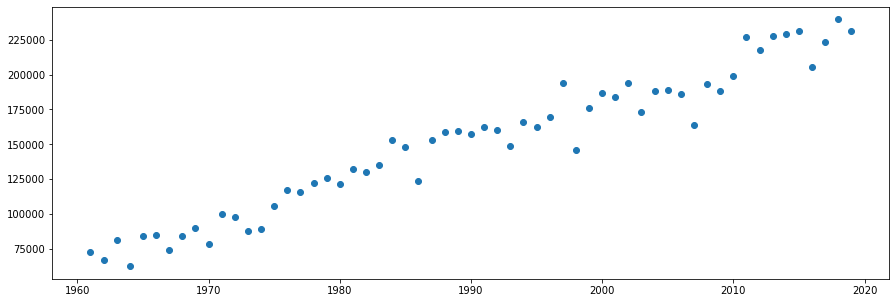

In [131]:
x_india_yield = df_india_yield['Year']
y_india_yield  = df_india_yield['Value']

plt.figure(figsize=(15,5))
plt.scatter(x_india_yield , y_india_yield )

plt.show()

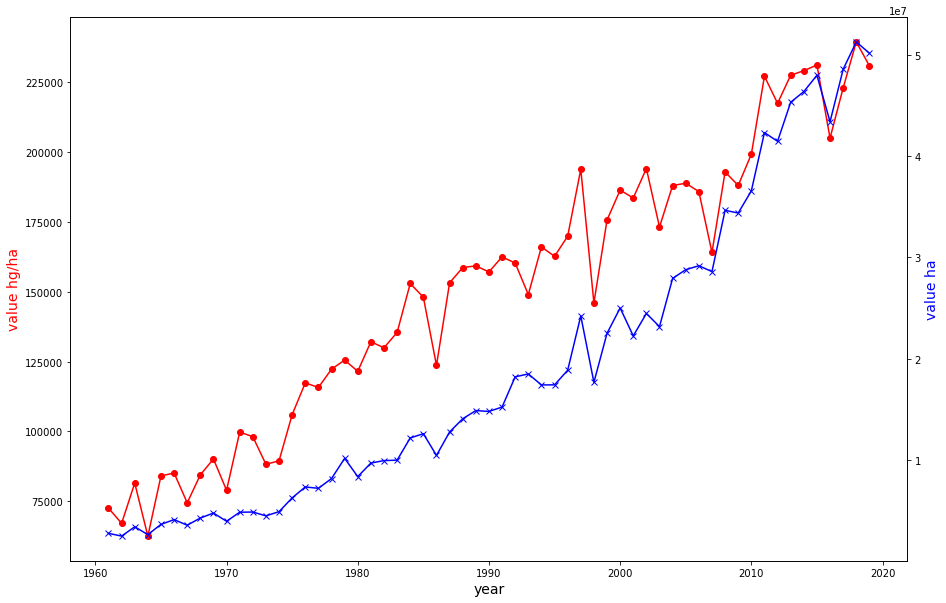

In [132]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(15, 10))

# make a plot
ax.plot(df_india_yield["Year"], df_india_yield["Value"], color="red", marker="o")

# set x-axis label
ax.set_xlabel("year",fontsize=14)

# set y-axis label
ax.set_ylabel("value hg/ha",color="red",fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()

# make a plot with different y-axis using second axis object
ax2.plot(df_india_prod["Year"], df_india_prod["Value"],color="blue",marker="x")
ax2.set_ylabel("value ha",color="blue",fontsize=14)
plt.show()

# save the plot as a file
fig.savefig('production_vs_yield_india.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

# CHINA Data Analysis

In [133]:
file_name_china = "FAOSTAT_data_2-28-2021_china.csv"
folder_path_china = "../data"
full_file_path_china = os.path.join(folder_path_china, file_name_china)

In [134]:
df_china_potatoes = pd.read_csv(full_file_path_china)

In [135]:
df_china_potatoes.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QC,Crops,351,China,5312,Area harvested,116,Potatoes,1961,1961,ha,1300797,A,"Aggregate, may include official, semi-official..."
1,QC,Crops,351,China,5312,Area harvested,116,Potatoes,1962,1962,ha,1500944,A,"Aggregate, may include official, semi-official..."
2,QC,Crops,351,China,5312,Area harvested,116,Potatoes,1963,1963,ha,1501306,A,"Aggregate, may include official, semi-official..."
3,QC,Crops,351,China,5312,Area harvested,116,Potatoes,1964,1964,ha,1601612,A,"Aggregate, may include official, semi-official..."
4,QC,Crops,351,China,5312,Area harvested,116,Potatoes,1965,1965,ha,1701234,A,"Aggregate, may include official, semi-official..."


In [136]:
df_temp_china = df_china_potatoes[['Element', 'Item', 'Value', 'Unit', 'Year']]

In [137]:
df_temp_china.head()

,Element,Item,Value,Unit,Year
0,Area harvested,Potatoes,1300797,ha,1961
1,Area harvested,Potatoes,1500944,ha,1962
2,Area harvested,Potatoes,1501306,ha,1963
3,Area harvested,Potatoes,1601612,ha,1964
4,Area harvested,Potatoes,1701234,ha,1965


In [138]:
df_china_prod = df_temp_china[(df_temp_china['Element'] == 'Production')]
df_china_prod.head()

,Element,Item,Value,Unit,Year
118,Production,Potatoes,12907173,tonnes,1961
119,Production,Potatoes,13807856,tonnes,1962
120,Production,Potatoes,12009773,tonnes,1963
121,Production,Potatoes,14019152,tonnes,1964
122,Production,Potatoes,16016136,tonnes,1965


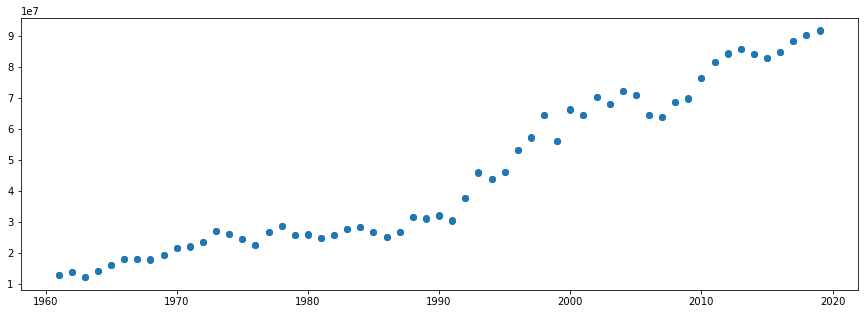

In [139]:
x_china_prod = df_china_prod['Year']
y_china_prod = df_china_prod['Value']

plt.figure(figsize=(15,5))
plt.scatter(x_china_prod, y_china_prod)

plt.show()

In [140]:
df_china_yield = df_temp_china[(df_temp_china['Element'] == 'Yield')]
df_china_yield.head()

,Element,Item,Value,Unit,Year
59,Yield,Potatoes,99225,hg/ha,1961
60,Yield,Potatoes,91994,hg/ha,1962
61,Yield,Potatoes,79996,hg/ha,1963
62,Yield,Potatoes,87532,hg/ha,1964
63,Yield,Potatoes,94144,hg/ha,1965


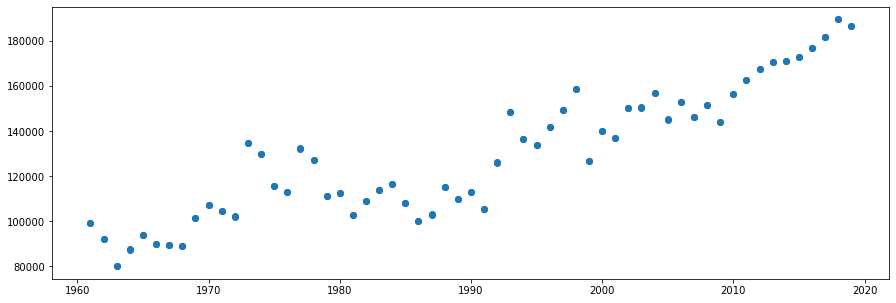

In [141]:
x_china_yield = df_china_yield['Year']
y_china_yield  = df_china_yield['Value']

plt.figure(figsize=(15,5))
plt.scatter(x_china_yield , y_china_yield )

plt.show()

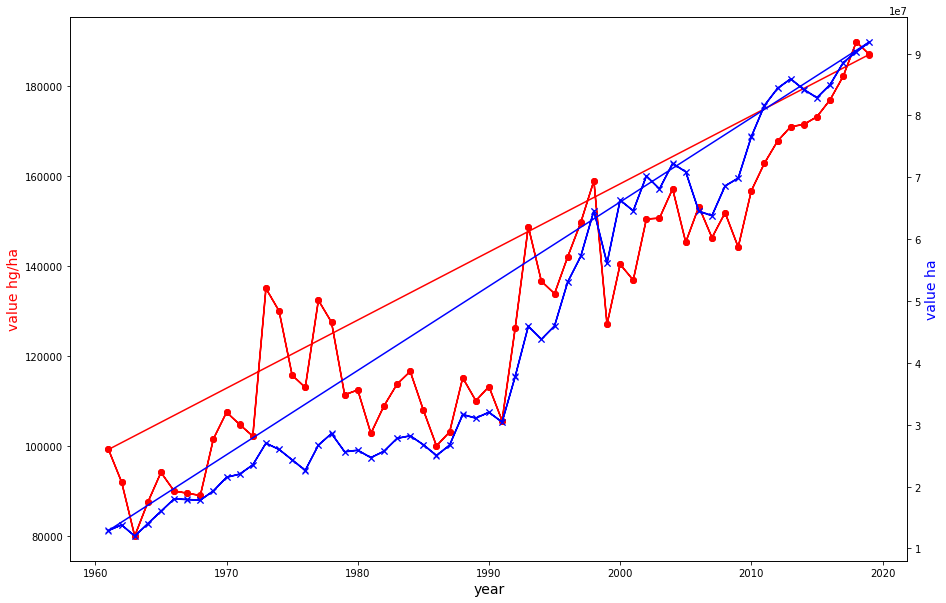

In [142]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(15, 10))

# make a plot
ax.plot(df_china_yield["Year"], df_china_yield["Value"], color="red", marker="o")

# set x-axis label
ax.set_xlabel("year",fontsize=14)

# set y-axis label
ax.set_ylabel("value hg/ha",color="red",fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()

# make a plot with different y-axis using second axis object
ax2.plot(df_china_prod["Year"], df_china_prod["Value"],color="blue",marker="x")
ax2.set_ylabel("value ha",color="blue",fontsize=14)
plt.show()

# save the plot as a file
fig.savefig('production_vs_yield_china.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

# ROMANIA Data Analysis

In [143]:
file_name_romania = "FAOSTAT_data_2-28-2021_romania.csv"
folder_path_romania = "../data"
full_file_path_romania = os.path.join(folder_path_romania, file_name_romania)

In [144]:
df_romania_potatoes = pd.read_csv(full_file_path_romania)

In [145]:
df_romania_potatoes.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QC,Crops,183,Romania,5312,Area harvested,116,Potatoes,1961,1961,ha,300700,NaN,Official data
1,QC,Crops,183,Romania,5312,Area harvested,116,Potatoes,1962,1962,ha,304800,NaN,Official data
2,QC,Crops,183,Romania,5312,Area harvested,116,Potatoes,1963,1963,ha,331800,NaN,Official data
3,QC,Crops,183,Romania,5312,Area harvested,116,Potatoes,1964,1964,ha,320800,NaN,Official data
4,QC,Crops,183,Romania,5312,Area harvested,116,Potatoes,1965,1965,ha,311800,NaN,Official data


In [146]:
df_temp_romania = df_romania_potatoes[['Element', 'Item', 'Value', 'Unit', 'Year']]

In [147]:
df_temp_romania.head()

,Element,Item,Value,Unit,Year
0,Area harvested,Potatoes,300700,ha,1961
1,Area harvested,Potatoes,304800,ha,1962
2,Area harvested,Potatoes,331800,ha,1963
3,Area harvested,Potatoes,320800,ha,1964
4,Area harvested,Potatoes,311800,ha,1965


In [148]:
df_romania_prod = df_temp_romania[(df_temp_romania['Element'] == 'Production')]
df_romania_prod.head()

,Element,Item,Value,Unit,Year
118,Production,Potatoes,2874800,tonnes,1961
119,Production,Potatoes,2597400,tonnes,1962
120,Production,Potatoes,2691900,tonnes,1963
121,Production,Potatoes,2639700,tonnes,1964
122,Production,Potatoes,2194700,tonnes,1965


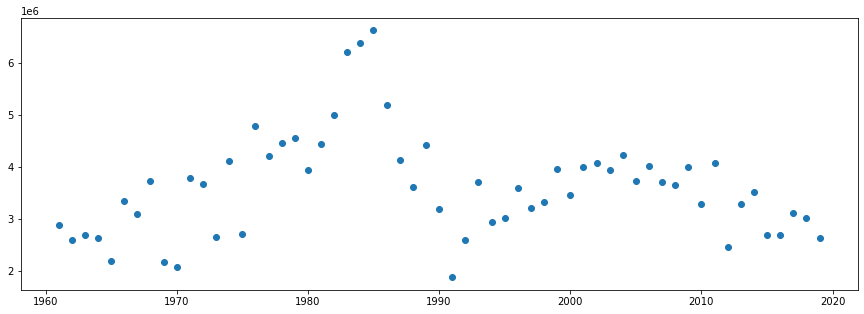

In [149]:
x_romania_prod = df_romania_prod['Year']
y_romania_prod = df_romania_prod['Value']

plt.figure(figsize=(15,5))
plt.scatter(x_romania_prod, y_romania_prod)

plt.show()

In [150]:
df_romania_yield = df_temp_romania[(df_temp_romania['Element'] == 'Yield')]
df_romania_yield.head()

,Element,Item,Value,Unit,Year
59,Yield,Potatoes,95604,hg/ha,1961
60,Yield,Potatoes,85217,hg/ha,1962
61,Yield,Potatoes,81130,hg/ha,1963
62,Yield,Potatoes,82285,hg/ha,1964
63,Yield,Potatoes,70388,hg/ha,1965


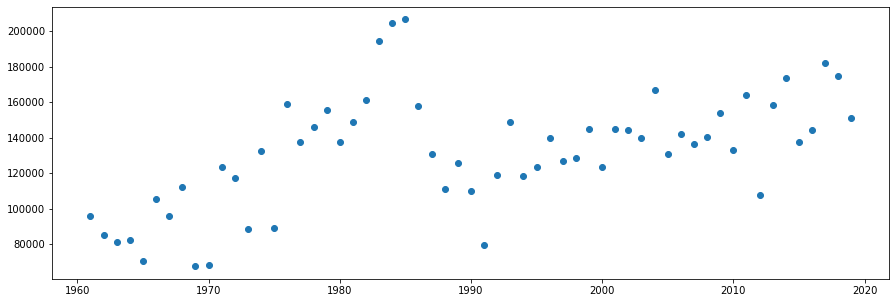

In [151]:
x_romania_yield = df_romania_yield['Year']
y_romania_yield  = df_romania_yield['Value']

plt.figure(figsize=(15,5))
plt.scatter(x_romania_yield , y_romania_yield )

plt.show()

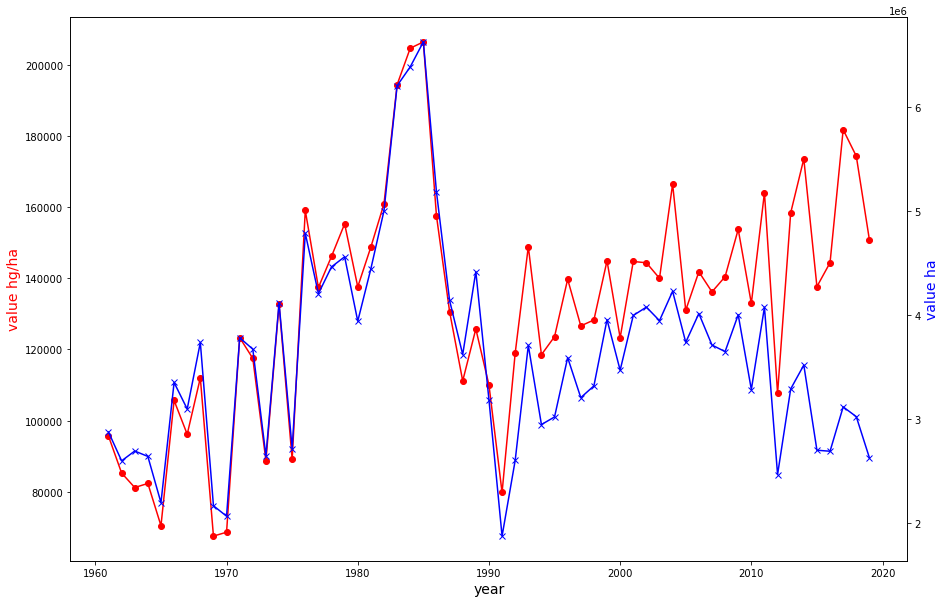

In [152]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(15, 10))

# make a plot
ax.plot(df_romania_yield["Year"], df_romania_yield["Value"], color="red", marker="o")

# set x-axis label
ax.set_xlabel("year",fontsize=14)

# set y-axis label
ax.set_ylabel("value hg/ha",color="red",fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()

# make a plot with different y-axis using second axis object
ax2.plot(df_romania_prod["Year"], df_romania_prod["Value"],color="blue",marker="x")
ax2.set_ylabel("value ha",color="blue",fontsize=14)
plt.show()

# save the plot as a file
fig.savefig('production_vs_yield_romania.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

# FRANCE Data Analysis

In [153]:
file_name_france = "FAOSTAT_data_2-28-2021_france.csv"
folder_path_france = "../data"
full_file_path_france = os.path.join(folder_path_france, file_name_france)

In [154]:
df_france_potatoes = pd.read_csv(full_file_path_france)

In [155]:
df_france_potatoes.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QC,Crops,68,France,5312,Area harvested,116,Potatoes,1961,1961,ha,890176,NaN,Official data
1,QC,Crops,68,France,5312,Area harvested,116,Potatoes,1962,1962,ha,862200,NaN,Official data
2,QC,Crops,68,France,5312,Area harvested,116,Potatoes,1963,1963,ha,844000,NaN,Official data
3,QC,Crops,68,France,5312,Area harvested,116,Potatoes,1964,1964,ha,691070,NaN,Official data
4,QC,Crops,68,France,5312,Area harvested,116,Potatoes,1965,1965,ha,575117,NaN,Official data


In [156]:
df_temp_france = df_france_potatoes[['Element', 'Item', 'Value', 'Unit', 'Year']]

In [157]:
df_temp_france.head()

,Element,Item,Value,Unit,Year
0,Area harvested,Potatoes,890176,ha,1961
1,Area harvested,Potatoes,862200,ha,1962
2,Area harvested,Potatoes,844000,ha,1963
3,Area harvested,Potatoes,691070,ha,1964
4,Area harvested,Potatoes,575117,ha,1965


In [158]:
df_france_prod = df_temp_france[(df_temp_france['Element'] == 'Production')]
df_france_prod.head()

,Element,Item,Value,Unit,Year
118,Production,Potatoes,14331130,tonnes,1961
119,Production,Potatoes,13389000,tonnes,1962
120,Production,Potatoes,15974000,tonnes,1963
121,Production,Potatoes,11566400,tonnes,1964
122,Production,Potatoes,11223210,tonnes,1965


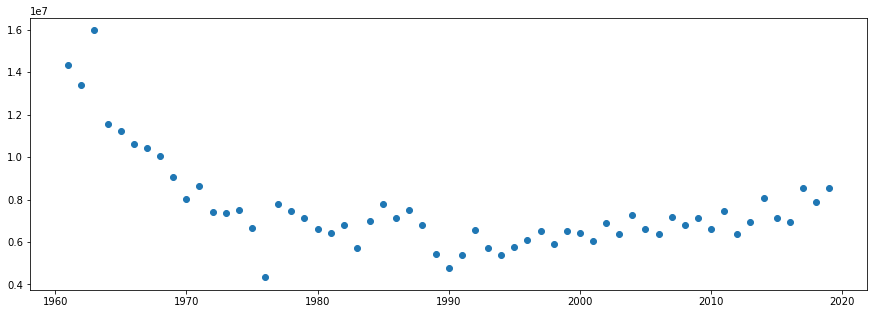

In [159]:
x_france_prod = df_france_prod['Year']
y_france_prod = df_france_prod['Value']

plt.figure(figsize=(15,5))
plt.scatter(x_france_prod, y_france_prod)

plt.show()

In [160]:
df_france_yield = df_temp_france[(df_temp_france['Element'] == 'Yield')]
df_france_yield.head()

,Element,Item,Value,Unit,Year
59,Yield,Potatoes,160992,hg/ha,1961
60,Yield,Potatoes,155289,hg/ha,1962
61,Yield,Potatoes,189265,hg/ha,1963
62,Yield,Potatoes,167369,hg/ha,1964
63,Yield,Potatoes,195147,hg/ha,1965


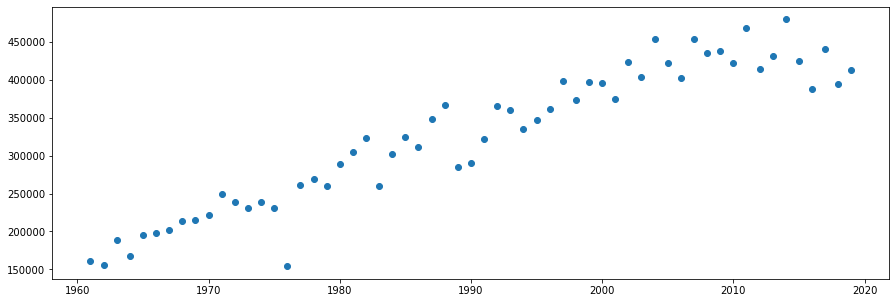

In [161]:
x_france_yield = df_france_yield['Year']
y_france_yield = df_france_yield['Value']

plt.figure(figsize=(15,5))
plt.scatter(x_france_yield , y_france_yield )

plt.show()

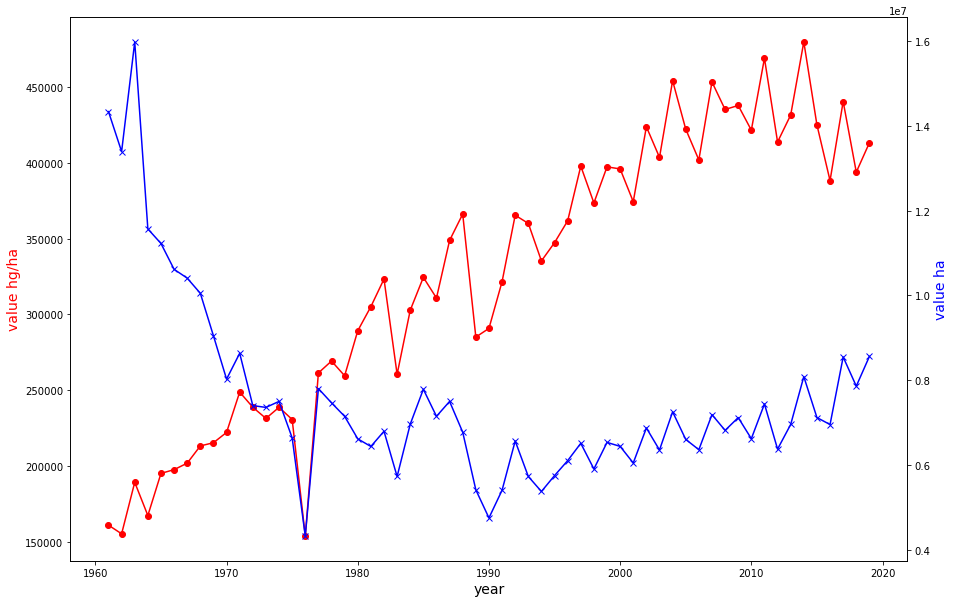

In [162]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(15, 10))

# make a plot
ax.plot(df_france_yield["Year"], df_france_yield["Value"], color="red", marker="o")

# set x-axis label
ax.set_xlabel("year",fontsize=14)

# set y-axis label
ax.set_ylabel("value hg/ha",color="red",fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()

# make a plot with different y-axis using second axis object
ax2.plot(df_france_prod["Year"], df_france_prod["Value"],color="blue",marker="x")
ax2.set_ylabel("value ha",color="blue",fontsize=14)
plt.show()

# save the plot as a file
fig.savefig('production_vs_yield_france.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')